In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Earthquake\ Shelter\ Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Earthquake Shelter Project


In [2]:
import csv
import pickle
import datetime

In [3]:
!pip install "pandas<2.0.0"

In [4]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [5]:
def read_pickle(dataset_name):
  with open('data/' + dataset_name + '.pkl', 'rb') as file_:
    return pickle.load(file_)

In [6]:
features = read_pickle('all_features')

In [7]:
features

mesh_id  latitude  longitude     area  rice_paddy  other_agriculture  \
106   52386788  35.23333   138.9750  1051735        0.00               0.00   
107   52386789  35.23333   138.9875  1051724        0.00               0.00   
108   52386799  35.24167   138.9875  1051618        0.00               0.00   
109   52387709  35.25000   138.9875  1051511        0.00               0.00   
110   52387719  35.25833   138.9875  1051405        0.00               0.00   
...        ...       ...        ...      ...         ...                ...   
3104  54407590  36.65833   140.6250  1032429        0.02               0.00   
3105  54407593  36.65833   140.6625  1032424        0.09               0.04   
3106  54407594  36.65833   140.6750  1032422        0.03               0.02   
3107  54407595  36.65833   140.6875  1032420        0.17               0.00   
3108  54407596  36.65833   140.7000  1032419        0.15               0.07   

        forest  wasteland  building  road_transport  ...  shelter_capacity  \
106   0.870001       0.00      0.00            0.00  ...                 0   
107   0.490000       0.00      0.13            0.00  ...                 0   
108   0.370000       0.00      0.13            0.00  ...                 0   
109   0.240000       0.00      0.13            0.00  ...                 0   
110   0.810000       0.00      0.00            0.00  ...                 0   
...        ...        ...       ...             ...  ...               ...   
3104  0.789999       0.03      0.00            0.00  ...                 0   
3105  0.720000       0.00      0.00            0.03  ...                 0   
3106  0.400000       0.01      0.44            0.00  ...                 0   
3107  0.000000       0.00      0.74            0.00  ...                 0   
3108  0.450000       0.00      0.23            0.00  ...                 0   

      admin_code       2015      total      0-14      15-64       65+  \
106        14382     5.0496     5.3028    0.1016     4.3503    0.8510   
107        14382    75.2958    65.9669    4.2145    40.5774   21.1750   
108        14382   108.0358   101.8770    5.4472    67.8012   28.6286   
109        14382   152.7840   136.1682    7.3419    74.2575   54.5689   
110        14382   200.2709   184.6253    7.0879   107.2336   70.3038   
...          ...        ...        ...       ...        ...       ...   
3104        8202    14.9881    10.3759    0.0000     3.6713    6.7046   
3105        8202   167.4681   153.1830   19.3547    92.7364   41.0918   
3106        8202  2550.0067  2377.7682  266.0463  1353.3193  758.4026   
3107        8202  2192.2175  1977.9305  211.9500  1128.7168  637.2637   
3108        8202  1025.0540   890.4178   48.2011   343.6309  498.5857   

           75+       80+  prefecture  
106     0.8510    0.0000    kanagawa  
107     7.4996    4.5898    kanagawa  
108    12.5581    7.2093    kanagawa  
109    37.1519   21.3176    kanagawa  
110    50.4217   28.4400    kanagawa  
...        ...       ...         ...  
3104    3.9642    3.1207     ibaraki  
3105   21.5727   15.3604     ibaraki  
3106  395.4842  219.4620     ibaraki  
3107  352.3242  229.0642     ibaraki  
3108  355.1246  182.4059     ibaraki  

[15257 rows x 29 columns]

In [11]:
bottom_left = (35.7843004,139.8980858) # Matsudo station
top_right = (35.9293258,140.0115354)   # Togashira station (Toride)
facilities = features[features['prefecture'] == 'chiba']
c1 = (bottom_left[0] <= facilities['latitude']) & (facilities['latitude'] <= top_right[0])
c2 = (bottom_left[1] <= facilities['longitude']) & (facilities['longitude'] <= top_right[1])
selected_features = facilities[c1 & c2]

In [12]:
lat_width = 75 / 9000
lon_height = 0.0125
bottom_lat = 35.5
bottom_lon = 139.4625

In [13]:
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51', '#581845', '#C70039', '#FF5733', '#FFC300', '#DAF7A6',
          '#457B9D', '#9E2A2B', '#FF5733', '#FFC300', '#7209B7', '#3A0CA3', '#F72585', '#FFBE0B', '#3F681C', '#8EBA42']

In [43]:
color_list = ['#292f56', '#21416d', '#005483', '#006794', '#007a9a', '#008da1', '#00a1a4', '#00b5a3', '#00ca9a'][::-1]

In [30]:
features_copy = selected_features
features_copy

mesh_id  latitude  longitude     area  rice_paddy  other_agriculture  \
11984  53395752  35.79167   139.9000  1043957        0.00               0.00   
11985  53395753  35.79167   139.9125  1043951        0.00               0.00   
11986  53395754  35.79167   139.9250  1043945        0.00               0.06   
11987  53395755  35.79167   139.9375  1043940        0.00               0.03   
11988  53395756  35.79167   139.9500  1043934        0.00               0.02   
...         ...       ...        ...      ...         ...                ...   
3764   53406030  35.85833   140.0000  1043051        0.13               0.01   
3774   53406040  35.86667   140.0000  1042944        0.00               0.00   
3784   53406050  35.87500   140.0000  1042836        0.00               0.09   
3794   53406060  35.88333   140.0000  1042728        0.02               0.23   
3803   53406070  35.89167   140.0000  1042620        0.50               0.29   

       forest  wasteland  building  road_transport  ...  shelter_capacity  \
11984    0.00       0.00  0.959999            0.00  ...                 0   
11985    0.02       0.00  0.850000            0.03  ...                 0   
11986    0.11       0.00  0.670000            0.00  ...                 0   
11987    0.18       0.06  0.610002            0.01  ...                 0   
11988    0.04       0.00  0.880000            0.00  ...                 0   
...       ...        ...       ...             ...  ...               ...   
3764     0.04       0.00  0.290000            0.00  ...                 0   
3774     0.01       0.00  0.950000            0.00  ...                 0   
3784     0.19       0.01  0.560001            0.00  ...                 0   
3794     0.07       0.00  0.530000            0.00  ...                 0   
3803     0.06       0.00  0.110000            0.00  ...                 0   

       admin_code        2015       total       0-14      15-64        65+  \
11984       12207   9982.4694   9949.0802  1071.0107  6264.2869  2613.7826   
11985       12207  11006.3484  11161.0915  1213.3754  7302.0818  2645.6343   
11986       12207   8129.6557   8042.0758   794.4913  4903.3337  2344.2509   
11987       12207  11329.0259  11120.0037  1108.6063  6772.2414  3239.1560   
11988       12207  12527.1944  11873.3415  1097.3742  6534.7010  4241.2663   
...           ...         ...         ...        ...        ...        ...   
3764        12217    314.7927    302.3420    32.7956   165.0342   104.5121   
3774        12222  13783.5310  13948.0020  1648.4504  8958.5636  3340.9880   
3784        12222   9255.8272   8930.3220   790.1029  5036.9056  3103.3135   
3794        12217   4139.4158   3795.2442   258.9073  1737.4200  1798.9169   
3803        12217    704.9104    692.7152    55.5333   379.2227   257.9591   

             75+        80+  prefecture  
11984  1546.1977   909.8140       chiba  
11985  1520.5599   915.1202       chiba  
11986  1465.8288   890.8011       chiba  
11987  2003.2825  1252.2366       chiba  
11988  2790.8420  1811.3013       chiba  
...          ...        ...         ...  
3764     70.1101    41.1742       chiba  
3774   1928.3774  1149.9506       chiba  
3784   2123.8469  1308.9998       chiba  
3794   1445.9227   988.9571       chiba  
3803    138.4034    85.4936       chiba  

[139 rows x 29 columns]

In [69]:
def create_map(features, col):
  m2 = folium.Map(location=[35.7015082, 139.5221197], zoom_start=12, tiles='CartoDB positron') # Higashi-Koganei station

  for coord in zip(features['latitude'], features['longitude'], col):
    bottom_left = (coord[0], coord[1])
    top_right = (coord[0] + lat_width, coord[1] + lon_height)
    bounds = [bottom_left, top_right]
    center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]

    folium.Rectangle(bounds=bounds, color=None,
                     fill=True, fill_color=color_list[coord[2]], fill_opacity=0.8).add_to(m2)

    folium.map.Marker(
        location=center,
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=(5,12),  # Center of the DivIcon
            html=f'<div style="font-size: 14pt; color: white;">{coord[2]}</div>'
        )
    ).add_to(m2)


  return m2

In [70]:
create_map(features_copy, features_copy['shelter_count'])

### Land Usage

In [ ]:
land_usage_features = features[['rice_paddy', 'other_agriculture', 'forest', 'wasteland', 'building',
                              'road_transport', 'rail_transport', 'other_site', 'river_wetland',
                              'seashore', 'sea', 'golf_course', 'unknown']]

In [ ]:
land_usage_map = create_map(features, land_usage_features.values.argmax(axis=1))
land_usage_map

### Distance to water

In [ ]:
def create_map_from_colors(features, colors):
  m3 = folium.Map(location=[35.7015082, 139.5221197], zoom_start=10.3, tiles='cartodbpositron') # Higashi-Koganei station

  for coord in zip(features['latitude'], features['longitude'], colors):
    bottom_left = (coord[0], coord[1])
    top_right = (coord[0] + lat_width, coord[1] + lon_height)

    folium.Rectangle(bounds=[bottom_left, top_right], color=None,
                     fill=True, fill_color=coord[2], fill_opacity=1.0).add_to(m3)

  return m3

In [ ]:
column_data = features[['dist_to_water']].to_numpy().flatten()
normalized_column = column_data + 1
# normalized_column = (column_data - column_data.min()) / (column_data.max() - column_data.min())

cmap = plt.cm.Blues
norm = mcolors.LogNorm(vmin=normalized_column.min(), vmax=normalized_column.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# rgba_values = np.array([mcolors.rgb2hex(cmap(normalized_value)) for normalized_value in normalized_column.values.flatten()])
rgba_values = np.array(list(map(mcolors.rgb2hex, sm.to_rgba(normalized_column))))

In [ ]:
water_dist_map = create_map_from_colors(features, rgba_values)
water_dist_map

In [ ]:
column_data = features[['dist_to_water']].to_numpy().flatten()
normalized_column = (column_data.max() - column_data) / (column_data.max() - column_data.min())

cmap = plt.cm.Blues
rgba_values = np.array([mcolors.rgb2hex(cmap(normalized_value)) for normalized_value in normalized_column])

In [ ]:
rgba_values

array(['#08306b', '#1561a9', '#08306b', ..., '#60a7d2', '#206fb4',
       '#0e58a2'], dtype='<U7')

In [ ]:
water_dist_map = create_map_from_colors(features, rgba_values)
water_dist_map

### Shelter Distribution

In [ ]:
column_data = features[['shelter_count']].to_numpy().flatten()
normalized_column = (column_data - column_data.min()) / (column_data.max() - column_data.min())

cmap = plt.cm.Reds
rgba_values = np.array([mcolors.rgb2hex(cmap(normalized_value)) for normalized_value in normalized_column])

In [ ]:
shelter_dist_map = create_map_from_colors(features, rgba_values)
shelter_dist_map

# Generating Images for Paper / Slides

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [ ]:
# Load the image
image_path = 'image.jpeg'
image = Image.open(image_path)
image = image.resize((150, 150))  # Resize for simplicity

# Convert image to numpy array
image_np = np.array(image)

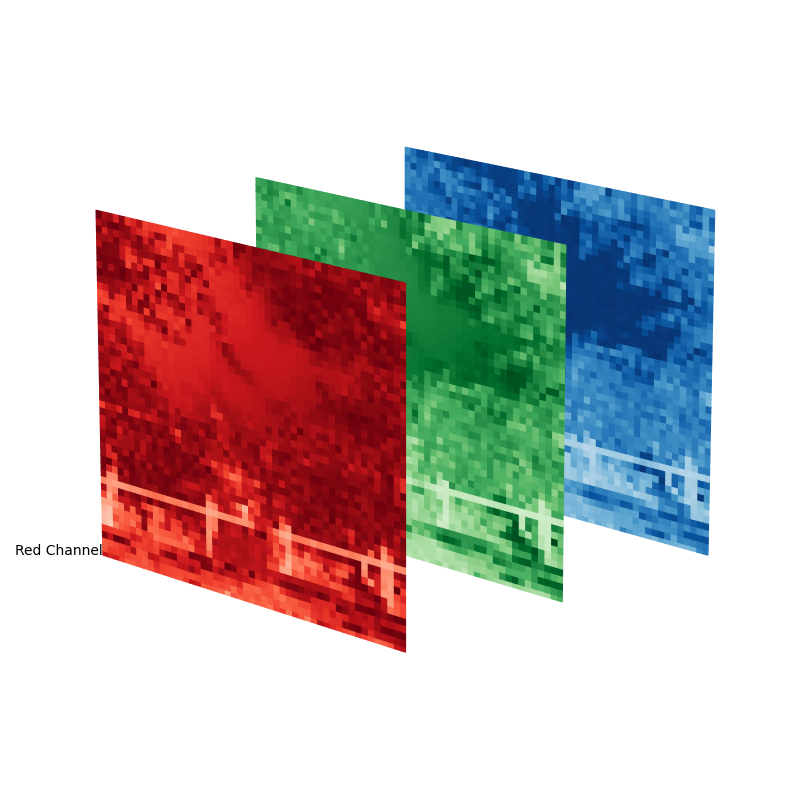

In [ ]:
# Extract RGB channels
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Create the figure and a 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of coordinates, reversing the Y-axis
x = np.arange(image_np.shape[1])
y = np.arange(image_np.shape[0])
X, Y = np.meshgrid(x, y[::-1])  # Reverse the Y-axis here

# Plot the red channel as a vertical 3D surface perpendicular to Z-axis
ax.plot_surface(X, np.full_like(X, 0), Y, facecolors=plt.cm.Reds(red_channel / 255.0), shade=False, alpha=1.0)

# Plot the green channel as a vertical 3D surface perpendicular to Z-axis
ax.plot_surface(X, np.full_like(X, 1), Y, facecolors=plt.cm.Greens(green_channel / 255.0), shade=False, alpha=1.0)

# Plot the blue channel as a vertical 3D surface perpendicular to Z-axis
ax.plot_surface(X, np.full_like(X, 2), Y, facecolors=plt.cm.Blues(blue_channel / 255.0), shade=False, alpha=1.0)

# Remove axis labels and ticks
ax.set_axis_off()

# Set camera angle
ax.view_init(elev=15, azim=-45)  # Adjust the elevation angle (tilt) and azimuth angle (rotation)

# Show the plot
plt.show()

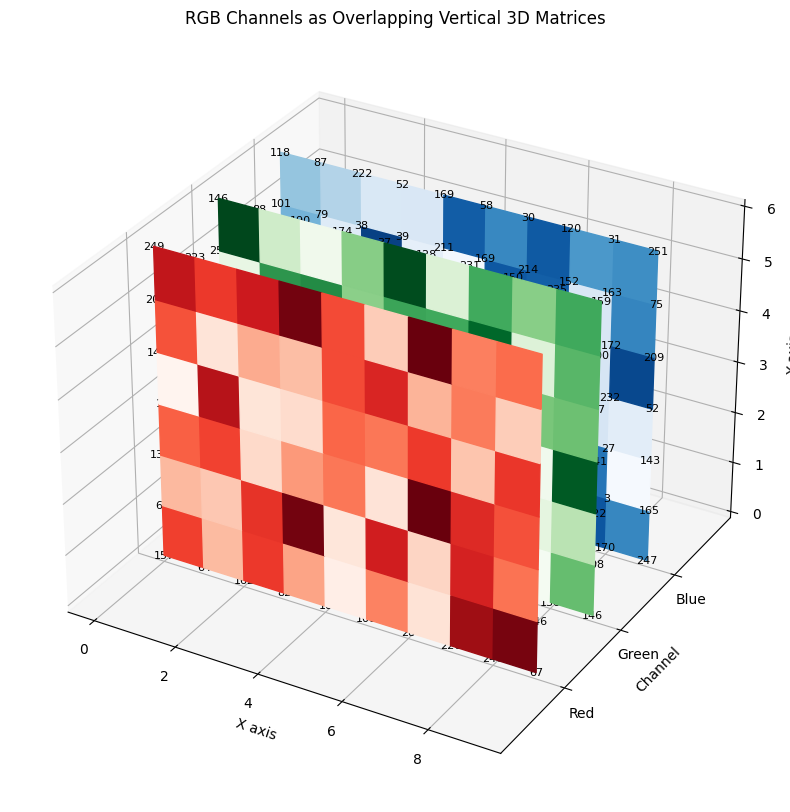

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate dummy image data
height, width = 7, 10
dummy_image = np.random.randint(0, 256, size=(height, width, 3), dtype=np.uint8)

# Extract RGB channels
red_channel = dummy_image[:, :, 0]
green_channel = dummy_image[:, :, 1]
blue_channel = dummy_image[:, :, 2]

# Create the figure and a 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of coordinates
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)

# Plot the red channel as a vertical 3D surface perpendicular to Z-axis
for i in range(height):
    for j in range(width):
        ax.text(j, 0, i, str(red_channel[i, j]), color='black', fontsize=8, ha='center', va='center')
ax.plot_surface(X, np.full_like(X, 0), Y, facecolors=plt.cm.Reds(red_channel / 255.0), shade=False, alpha=1.0)

# Plot the green channel as a vertical 3D surface perpendicular to Z-axis
for i in range(height):
    for j in range(width):
        ax.text(j, 1, i, str(green_channel[i, j]), color='black', fontsize=8, ha='center', va='center')
ax.plot_surface(X, np.full_like(X, 1), Y, facecolors=plt.cm.Greens(green_channel / 255.0), shade=False, alpha=1.0)

# Plot the blue channel as a vertical 3D surface perpendicular to Z-axis
for i in range(height):
    for j in range(width):
        ax.text(j, 2, i, str(blue_channel[i, j]), color='black', fontsize=8, ha='center', va='center')
ax.plot_surface(X, np.full_like(X, 2), Y, facecolors=plt.cm.Blues(blue_channel / 255.0), shade=False, alpha=1.0)

# Set axis labels
ax.set_xlabel('X axis')
ax.set_ylabel('Channel')
ax.set_zlabel('Y axis')

# Set ticks
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Red', 'Green', 'Blue'])

# Set limits
ax.set_ylim(-1, 3)

# Add title
ax.set_title('RGB Channels as Overlapping Vertical 3D Matrices')

# Show the plot
plt.show()


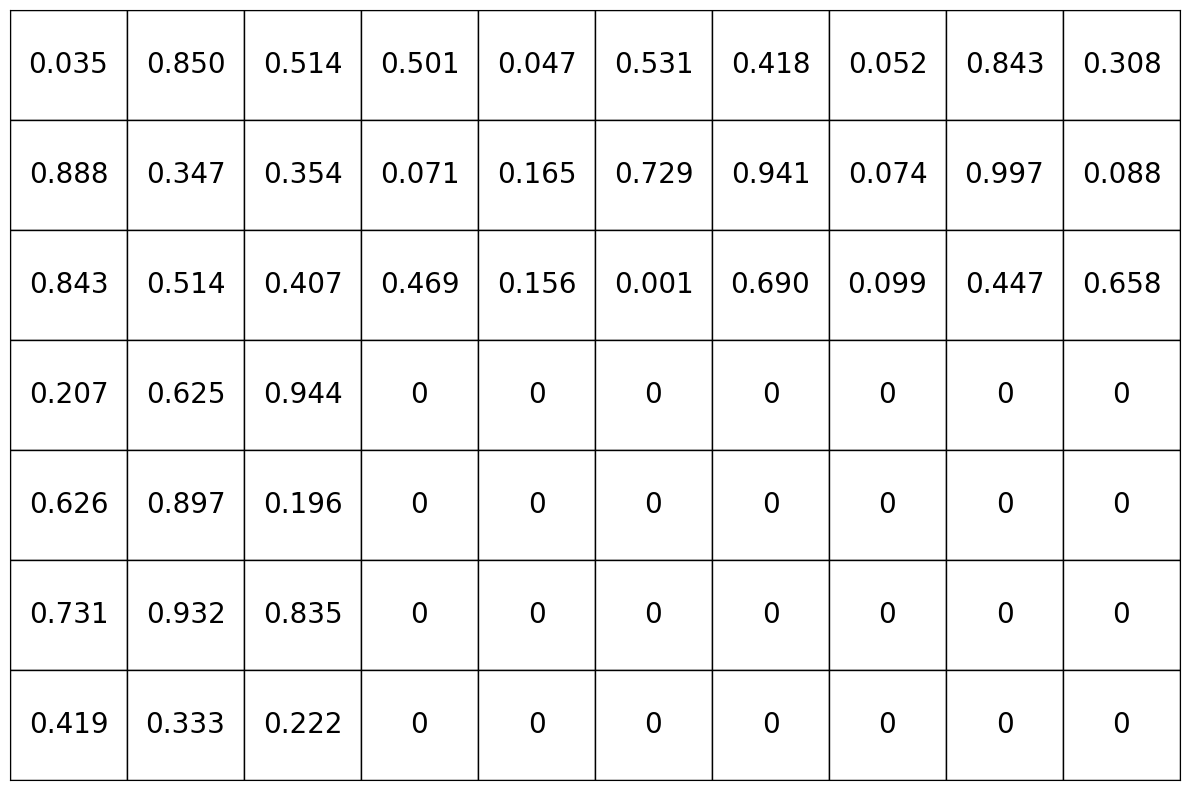

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix dimensions
rows = 7
cols = 10
padding = 0.5

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create matrix
matrix = np.random.rand(rows, cols)
matrix[-4:, -7:] = 0  # Set bottom 3x5 matrix to 0s

# Plot matrix
for i in range(rows):
    for j in range(cols):
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, facecolor='white', edgecolor='black')
        ax.add_patch(rect)
        if matrix[i, j] < 1e-6:
            ax.text(j, i, '0', va='center', ha='center', color='black', fontsize=20)
        else:
            ax.text(j, i, f'{matrix[i, j]:.3f}', va='center', ha='center', color='black', fontsize=20)

# Set axis limits
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(rows - 0.5, -0.5)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Show plot
plt.tight_layout()
plt.savefig('matrix.png', dpi=300)  # Save high-quality image
plt.show()


In [ ]:
# Set axis limits
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(rows - 0.5, -0.5)

(6.5, -0.5)